In [1]:
import sys
sys.path.append('../qick/qick_lib/')

from mkids import *

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from numpy.fft import fft, fftshift

In [2]:
# Initialize Firmware.
soc = MkidsSoc('./mkids_2x2_kidsim_v1.bit')

# Name the Chains.
soc['dual'][0]['name'] = '224 CH0 <-> 229 CH0'
soc['dual'][1]['name'] = '225 CH0 <-> 229 CH2'
soc['simu'][0]['name'] = '224 CH1 <-> 229 CH1'
soc['simu'][1]['name'] = '225 CH1 <-> 229 CH3'

# Print information.
print(soc)

resetting clocks: 122.88 409.6

QICK configuration:

	Board: ZCU111

	Analysis Chains
	0:	 Analysis Chain: ADC Tile = 0, ADC Ch = 1, fs = 1024.000 MHz, Number of Channels = 256 
	1:	 Analysis Chain: ADC Tile = 1, ADC Ch = 1, fs = 1024.000 MHz, Number of Channels = 256 
	2:	 Analysis Chain: ADC Tile = 0, ADC Ch = 0, fs = 1024.000 MHz, Number of Channels = 1024 
	3:	 Analysis Chain: ADC Tile = 1, ADC Ch = 0, fs = 1024.000 MHz, Number of Channels = 1024 

	Synthesis Chains
	0:	 Synthesis Chain: DAC Tile = 1, DAC Ch = 0, fs = 1024.000 MHz, Number of Channels = 1024 
	1:	 Synthesis Chain: DAC Tile = 1, DAC Ch = 2, fs = 1024.000 MHz, Number of Channels = 1024 
	2:	 Synthesis Chain: DAC Tile = 1, DAC Ch = 1, fs = 1024.000 MHz, Number of Channels = 256 
	3:	 Synthesis Chain: DAC Tile = 1, DAC Ch = 3, fs = 1024.000 MHz, Number of Channels = 256 

	Dual Chains
	Dual 0: 224 CH0 <-> 229 CH0
		Analysis : ADC Tile = 0, ADC Ch = 0, fs = 1024.000 MHz, Number of Channels = 1024
		Synthesis: DAC Tile = 

In [3]:
################################
### Processing Chain Example ###
################################
# Build processing chain.
chain = KidsChain(soc, dual=soc['dual'][0])

# Build simulation chain.
simu = SimuChain(soc, simu=soc['simu'][0])

In [4]:
###############################
### Resonator Configuration ###
###############################
simu.analysis.qout(3)
simu.synthesis.qout(3)

# Set mixer.
simu.set_mixer_frequency(1000)

# Disable all resonators.
simu.alloff()

# Enable resonator.
#simu.enable(1050)
simu.enable(1100)
#simu.enable(1105)

#simu.disable(595)
#simu.disable(600)
#simu.disable(605)



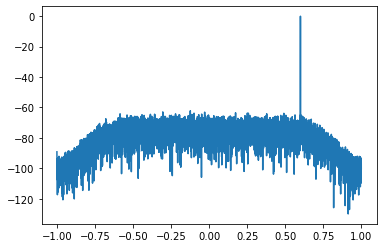

In [5]:
fmix = 1200
chain.set_mixer_frequency(fmix)

# Data source.
chain.source("input")

# Set output tone.
chain.set_tone(1410.6, g=0.5)

# Decimation.
chain.set_decimation(1)
chain.analysis.qout(1)
chain.synthesis.qout(1)

# Transfer data.
[xi,xq] = chain.get_bin(1410)
x = xi + 1j*xq
    
# Spectrum.
F = (np.arange(len(x))/len(x)-0.5)*chain.analysis.fs_ch    
w = np.hanning(len(x))
xw = x*w
YY = fftshift(fft(xw))
YYlog = 20*np.log10(abs(YY)/max(abs(YY)))
   
plt.plot(F,YYlog);

In [ ]:
plt.plot(xi)

Starting sweep:
  * Start      : 1080 MHz
  * End        : 1120 MHz
  * Resolution : 0.20100502512559615 MHz
  * Points     : 200
 
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195

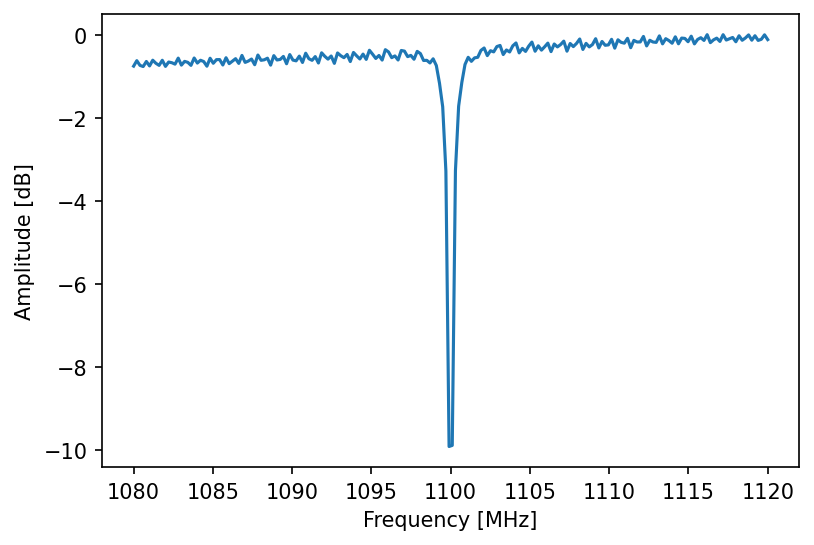

In [6]:
#######################
### Frequency Sweep ###
#######################
chain.analysis.qout(1)
chain.synthesis.qout(1)
f,a,phi=chain.sweep(1080,1120,N=200,g=0.5)

plt.figure(dpi=150)
plt.plot(f,20*np.log10(a/max(a)))
#plt.ylim([-60,10])
plt.xlabel("Frequency [MHz]");
plt.ylabel("Amplitude [dB]");

#plt.figure(dpi=150)
#plt.plot(f,phi)
#plt.xlabel("Frequency [MHz]");
#plt.ylabel("Phase [rad]");

i = 0, fstart = 0.0 MHz, fend = 819.2 MHz.
Starting sweep:
  * Start      : 0.0 MHz
  * End        : 819.2 MHz
  * Resolution : 8.274747474747475 MHz
  * Points     : 100
 
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, i = 1, fstart = 819.2 MHz, fend = 1638.4 MHz.
Starting sweep:
  * Start      : 819.2 MHz
  * End        : 1638.4 MHz
  * Resolution : 8.274747474747528 MHz
  * Points     : 100
 
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 

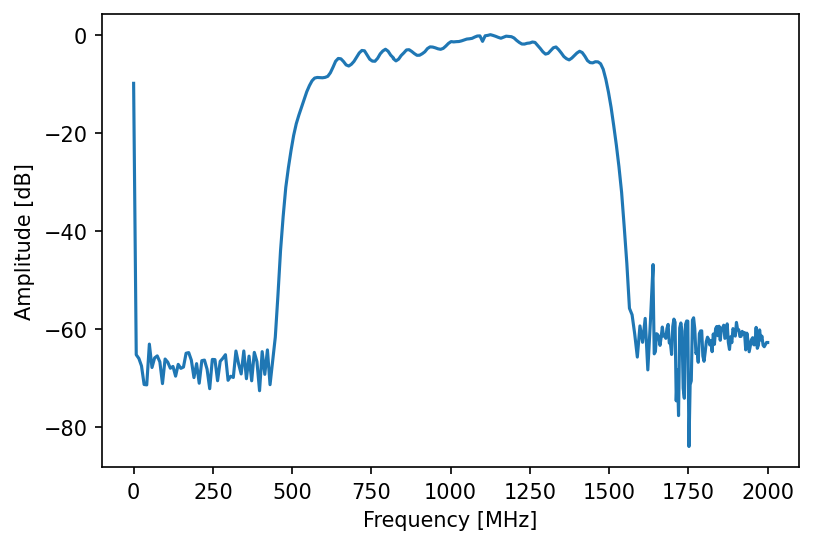

In [7]:
############################
### Wide Frequency Sweep ###
############################
fstart = 0
fend = 2000

chain.analysis.qout(2)
chain.synthesis.qout(2)

# Number of pointes per sweep.
N = 100
#df = 1
#N = int(np.round((fend - fstart)/df))

# Use 80 % the available bandwidth per sweep.
fbw = 0.8*min(chain.analysis.fs,chain.synthesis.fs)

if (fend-fstart)>fbw:
    fstart = np.arange(fstart, fend, fbw)

# Total number  of points.
NT = len(fstart)*N

f_v = np.zeros(NT)
a_v = np.zeros(NT)
phi_v = np.zeros(NT)
for i,ff in enumerate(fstart):
    fend_ = ff+fbw
    if fend_ > fend:
        fend_ = fend
    print("i = {}, fstart = {} MHz, fend = {} MHz.".format(i, ff, fend_))
    
    # Sweep.
    f,a,phi=chain.sweep(ff,fend_,N=N,g=0.5)
    
    # Concat values.
    f_v[i*N:(i+1)*N] = f
    a_v[i*N:(i+1)*N] = a
    phi_v[i*N:(i+1)*N] = phi
    
plt.figure(dpi=150)
plt.plot(f_v,20*np.log10(a_v/max(a_v)))
plt.xlabel("Frequency [MHz]");
plt.ylabel("Amplitude [dB]");
#plt.savefig('wide-vna.jpg')

#plt.figure(dpi=150)
#plt.plot(f_v,phi_v)
#plt.xlabel("Frequency [MHz]");
#plt.ylabel("Phase [rad]");

Spectrum
fstart = 1409 MHz, fend = 1414 MHz, fc = 1.0 MHz
i = 0, fck = 1409.0 MHz
i = 1, fck = 1410.0 MHz
i = 2, fck = 1411.0 MHz
i = 3, fck = 1412.0 MHz
i = 4, fck = 1413.0 MHz


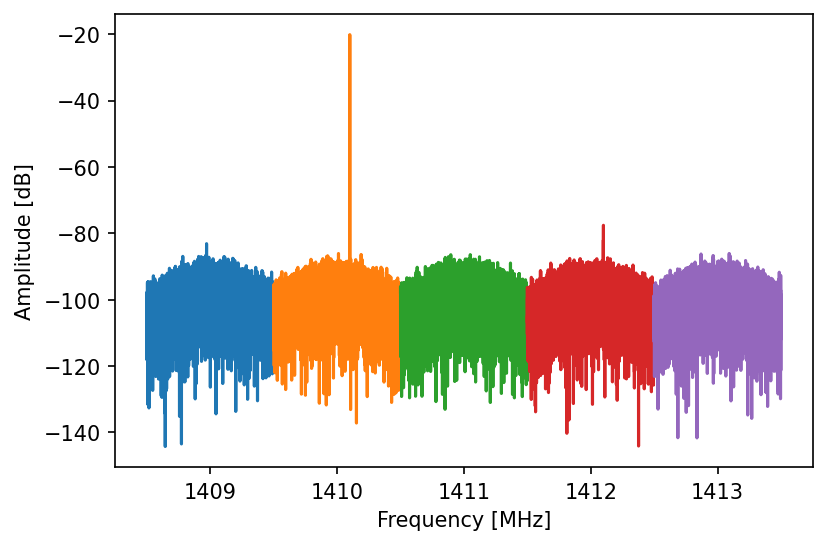

In [37]:
#########################
### Spectrum Analyzer ###
#########################

fmix = 1200
chain.set_mixer_frequency(fmix)

# Data source.
chain.source("input")

# Set output tone.
chain.synthesis.alloff()
chain.set_tone(1410.1, g=0.5)

# Decimation.
chain.set_decimation(2)
chain.analysis.qout(1)
chain.synthesis.qout(1)

# Frequency range.
fstart = 1409
fend   = 1414
f = np.arange(fstart, fend, chain.analysis.fc_ch)
print("Spectrum")
print("fstart = {} MHz, fend = {} MHz, fc = {} MHz".format(fstart, fend, chain.analysis.fc_ch))

# Set mixer to starting point.
#chain.analysis.set_mixer_frequency(-fstart)

# Frequency and amplitude vectors.
FF = []
AA = []
plt.figure(dpi=150);
for i,fck in enumerate(f):
    print("i = {}, fck = {} MHz".format(i,fck))
    
    # Transfer data.
    [xi,xq] = chain.get_bin(fck)
    x = xi + 1j*xq
    
    # Frequency vector.
    F = (np.arange(len(x))/len(x)-0.5)*chain.analysis.fs_ch    
    
    # Normalization factor.
    NF = (2**15)*len(F)

    w = np.hanning(len(x))
    xw = x*w
    YY = fftshift(fft(xw))
    YYlog = 20*np.log10(abs(YY)/NF)
    AA = np.concatenate((AA,YYlog))
    
    Fk = F+fck
    FF = np.concatenate((FF,Fk))
    plt.plot(Fk,YYlog);
plt.xlabel("Frequency [MHz]");
plt.ylabel("Amplitude [dB]");
#plt.savefig('wide-spectrum.jpg')
#plt.plot(FF,AA);

AnalysisChain: f = 1410 MHz, fd = 210.0 MHz, k = 210, fdds = 0.0
axis_chsel_in_0: channel = 210


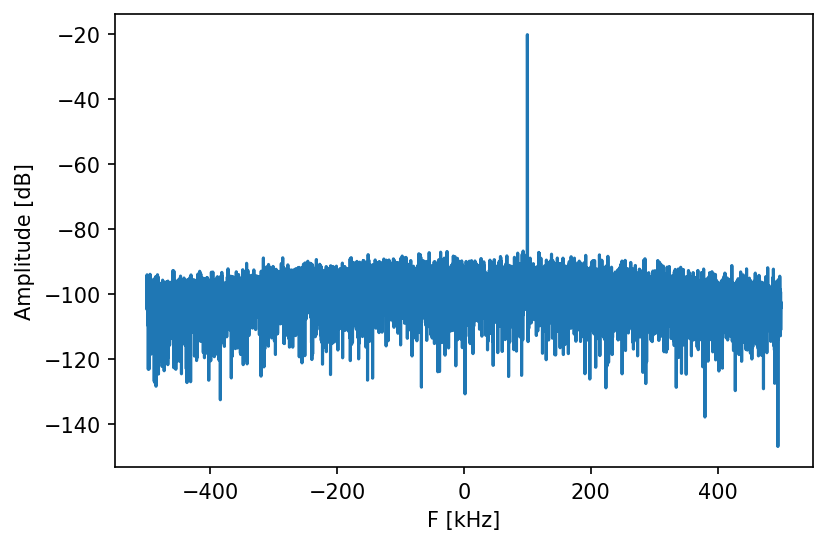

In [39]:
###############################
### Zooming-in the spectrum ###
###############################
# Set decimation.
chain.set_decimation(2)

# Set quantization.
#chain.analysis.qout(5)

# Data source.
chain.source("input")

# Get data.
fc = 1410
[xi,xq] = chain.analysis.get_bin(fc, force_dds=False, verbose=True)
xi = xi[100:]
xq = xq[100:]
x = xi + 1j*xq

w = np.hanning(len(x))
xw = x*w
F = (np.arange(len(x))/len(x)-0.5)*chain.analysis.fs_ch*1000
Y = fftshift(fft(xw))

# Normalization factor.
NF = (2**15)*len(F)

plt.figure(1,dpi=150)
plt.plot(F,20*np.log10(abs(Y)/NF))
plt.xlabel("F [kHz]");
plt.ylabel("Amplitude [dB]");
#plt.savefig('zoom-spectrum-2.jpg')

Starting sweep:
  * Start      : 1085.0 MHz
  * End        : 1115.0 MHz
  * Resolution : 0.020013342228139663 MHz
  * Points     : 1500
 
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 19

/home/xilinx/jupyter_notebooks/mkids/mkids.py:859: RuntimeWarning: Mean of empty slice.
  df = np.diff(f[idx]).mean()
/usr/lib/python3/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


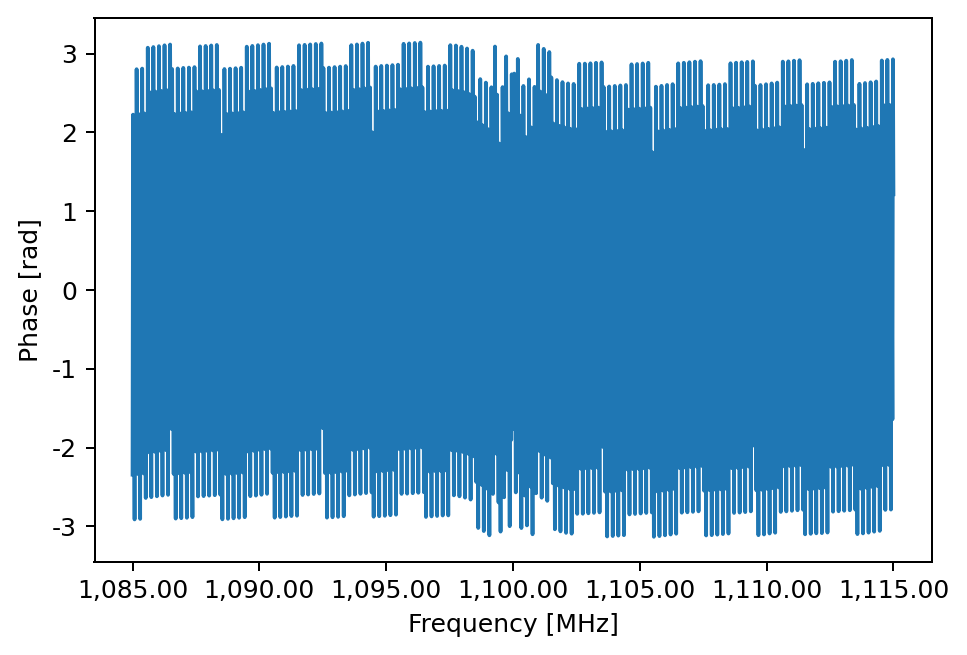

In [41]:
########################
### Delay estimation ###
########################
chain.set_mixer_frequency(900)

# Delta frequency per sweep.
df = 30

# Number of points per sweep.
N = 1500

# Starting frequency points.
fstart = 1100

# Frequency Sweep.
f,a,phi = chain.sweep(fstart-df/2,fstart+df/2,N=N, g=0.5, set_mixer=False)
df, dt = chain.phase_slope(f, phi)
 
print(" ")
print("df = {} MHz, dt = {} us".format(df, dt))

plt.figure(dpi=180)
plt.plot(f,phi)
plt.xlabel("Frequency [MHz]");
plt.ylabel("Phase [rad]");
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
#plt.savefig('phase-short.jpg')

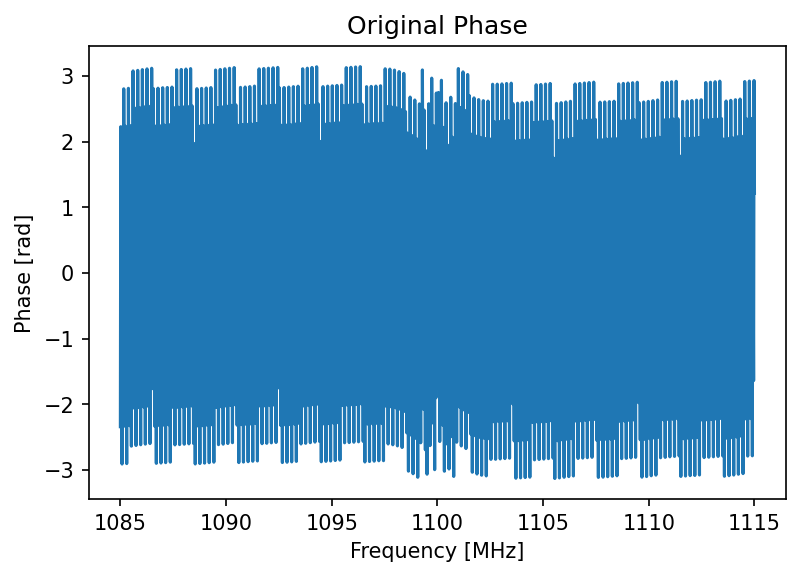

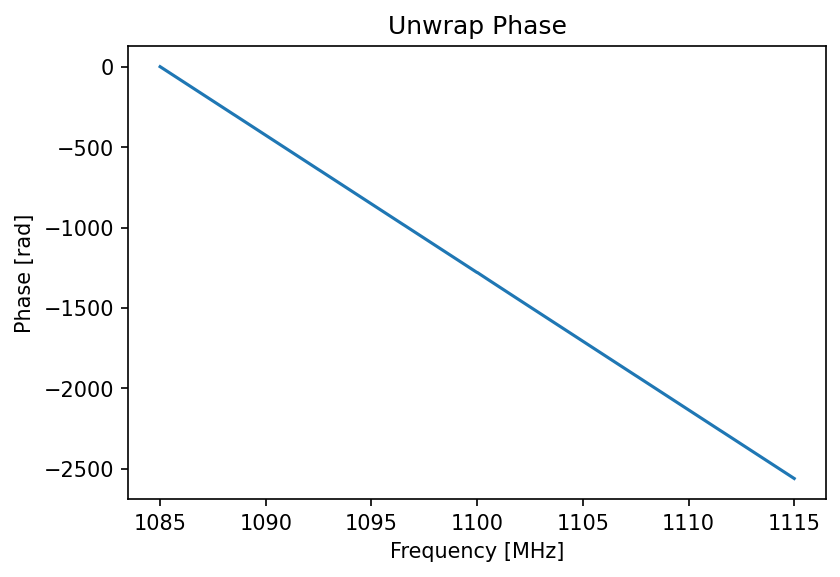

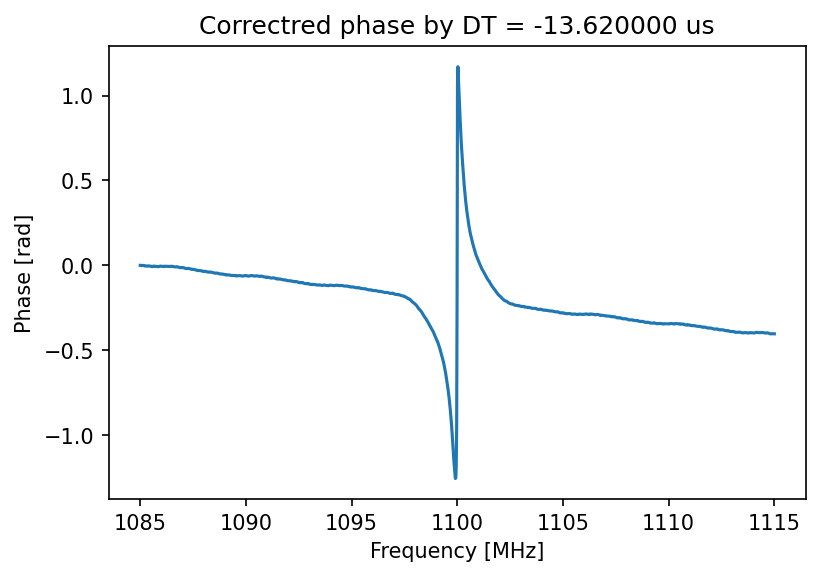

In [44]:
##############################
### Phase Correction by DT ###
##############################
# DT is in us.
DT = -13.62

phi_u, phi_dt = chain.phase_correction(f, phi, DT=DT, phase_cal=j_avg)

plt.figure(dpi=150)
plt.plot(f,phi)
plt.xlabel("Frequency [MHz]");
plt.ylabel("Phase [rad]");
plt.title("Original Phase");

plt.figure(dpi=150)
plt.plot(f,phi_u)
plt.xlabel("Frequency [MHz]");
plt.ylabel("Phase [rad]");
plt.title("Unwrap Phase");

plt.figure(dpi=150)
plt.plot(f,phi_dt)
plt.xlabel("Frequency [MHz]");
plt.ylabel("Phase [rad]");
plt.title("Correctred phase by DT = {:.6f} us".format(DT));

Slope = = 0.04006997651538749 us


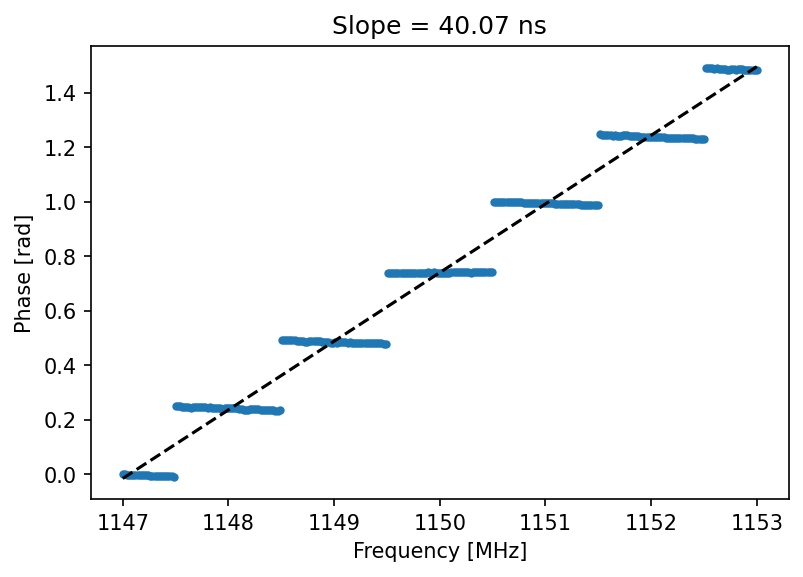

In [32]:
#################################
### Overall delay computation ###
#################################
data = chain.phase_fit(f, phi_dt, jumps=False)

m = data['fits'][0]['slope']
x = data['fits'][0]['data']['x']
y = data['fits'][0]['data']['y']
fn = data['fits'][0]['data']['fn']
    
print("Slope = = {} us".format(m/(2*np.pi)))
plt.figure(dpi=150);
plt.plot(x, y, '.', x, fn, '--k');
plt.xlabel("Frequency [MHz]");
plt.ylabel("Phase [rad]");
plt.title("Slope = {:.5} ns".format(1000*m/(2*np.pi)));
#plt.savefig('phase-slope-2.jpg')

In [33]:
####################################
### Jump-based delay computation ###
####################################
data = chain.phase_fit(f, phi_dt)

# Sampling period (ns).
ts = 1000/chain.analysis.fs

m_avg = 0
for i in range(len(data['fits'])):
    m  = data['fits'][i]['slope']
    x  = data['fits'][i]['data']['x']
    y  = data['fits'][i]['data']['y']
    fn = data['fits'][i]['data']['fn']
    
    m_avg = m_avg + m
      
    print("Slope [{}]\t= {:.5f} ns".format(i,1000*m/(2*np.pi)))
    #plt.figure(dpi=180);
    #plt.plot(x, y, '.', x, fn, '--k');
    #plt.xlabel('Frequency [MHz]')
    #plt.ylabel('Phase [rad]')
    #plt.title('Slope [{}] = {:.5} ns'.format(i,1000*m/(2*np.pi)))
    #plt.savefig('phase-slope-jump-{}.jpg'.format(i))
    
m_avg = m_avg/len(data['fits'])
print("Average Slope\t= {:.5f} ns".format(1000*m_avg/(2*np.pi)))
print(" ")
    
for i in range(len(data['jump']['value'])):
    jv = data['jump']['value'][i]
    
    print("Jump [{}]\t= {:.5f} rad, {:.5f} ns, {:5f} samples".format(i, jv, 1000*jv/(2*np.pi), 1000*jv/(2*np.pi*ts)))
    
j_avg = np.mean(data['jump']['value'])
print("Average Jump\t= {:.5f} rad, {:.5f} ns, {:.5f} samples".format(j_avg, 1000*j_avg/(2*np.pi), 1000*j_avg/(2*np.pi*ts)))

Slope [0]	= -3.09278 ns
Slope [1]	= -2.17332 ns
Slope [2]	= -1.96070 ns
Slope [3]	= 0.70005 ns
Slope [4]	= -1.98987 ns
Slope [5]	= -2.30845 ns
Slope [6]	= -1.75375 ns
Average Slope	= -1.79698 ns
 
Jump [0]	= 0.25775 rad, 41.02194 ns, 42.006470 samples
Jump [1]	= 0.25858 rad, 41.15466 ns, 42.142375 samples
Jump [2]	= 0.25832 rad, 41.11241 ns, 42.099112 samples
Jump [3]	= 0.25616 rad, 40.76942 ns, 41.747883 samples
Jump [4]	= 0.25773 rad, 41.01867 ns, 42.003118 samples
Jump [5]	= 0.25812 rad, 41.08040 ns, 42.066332 samples
Average Jump	= 0.25778 rad, 41.02625 ns, 42.01088 samples


In [24]:
j_avg

3.399787833817148

In [45]:
xx=a*np.exp(1j*phi_dt)

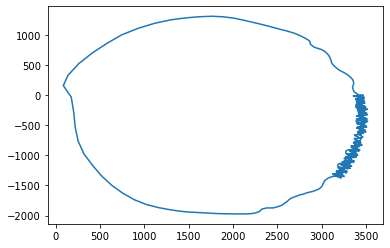

In [46]:
plt.plot(np.real(xx),np.imag(xx))

In [24]:
def phase_read(f, N=10, g=0.5, cg=0, comp=False, decimation = 2):
    # Default settings.
    chain.analysis.set_decimation(decimation)
    chain.analysis.source("product")

    # Quantize frequency.
    fq = chain.fq(f)

    # Set output tone.
    chain.set_tone(f=fq, g=g, cg=cg, comp=comp)

    t_v = np.zeros(N)
    a_v = np.zeros(N)
    phi_v = np.zeros(N)

    for i in range(N):
        # Get input data.
        [xi,xq] = chain.get_bin(fq)

        i0 = 100
        i1 = -100
        iMean = xi[i0:i1].mean()
        qMean = xq[i0:i1].mean()

        # Amplitude and phase.
        a = np.abs(iMean + 1j*qMean)
        phi = np.angle(iMean + 1j*qMean)

        t_v[i] = time.time()
        a_v[i] = a
        phi_v[i] = phi

        print("{}".format(i), end=", ")

    return t_v,a_v,phi_v

In [100]:
t,a,phi = phase_read(1140, N=500, cg=-0.56-1j*0.81, comp=True)

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 

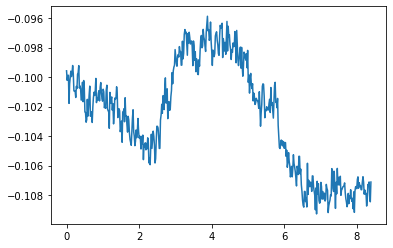

In [101]:
plt.plot(t-t[0],phi)

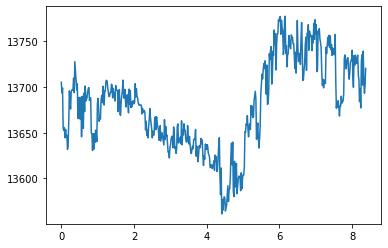

In [99]:
plt.plot(t-t[0],a)

In [92]:
phi_c = np.mean(phi)
phi_c = 2.174
cg = 0.99*np.exp(-1j*phi_c)

In [93]:
cg

(-0.5616108400904314-0.8152872280938295j)

In [163]:
np.real(cg)

-0.060292174896413066

In [62]:
np.exp(1j*np.pi/2)

(6.123233995736766e-17+1j)

In [17]:
1/13

0.07692307692307693